Load Data

In [66]:
import pandas as pd 
import os 

PATH = 'coding_round_data.csv'
df_eco = pd.read_csv(PATH)

In [67]:
import warnings
warnings.filterwarnings('ignore')
pd.set_option('mode.chained_assignment', None)

In [68]:
df_eco.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

In [69]:
df_eco.shape

(12330, 18)

In [70]:
df_eco.dtypes

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object

In [71]:
df_eco.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [72]:
df_eco.isnull().sum()

Administrative             0
Administrative_Duration    0
Informational              0
Informational_Duration     0
ProductRelated             0
ProductRelated_Duration    0
BounceRates                0
ExitRates                  0
PageValues                 0
SpecialDay                 0
Month                      0
OperatingSystems           0
Browser                    0
Region                     0
TrafficType                0
VisitorType                0
Weekend                    0
Revenue                    0
dtype: int64

In [73]:
df_eco.loc[df_eco.duplicated(keep=False)].head(5)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
85,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
132,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False


In [74]:
df_eco_dropdp = df_eco.drop_duplicates()

In [75]:
len(df_eco_dropdp.loc[df_eco_dropdp.duplicated(keep=False)])

0

Data EDA 

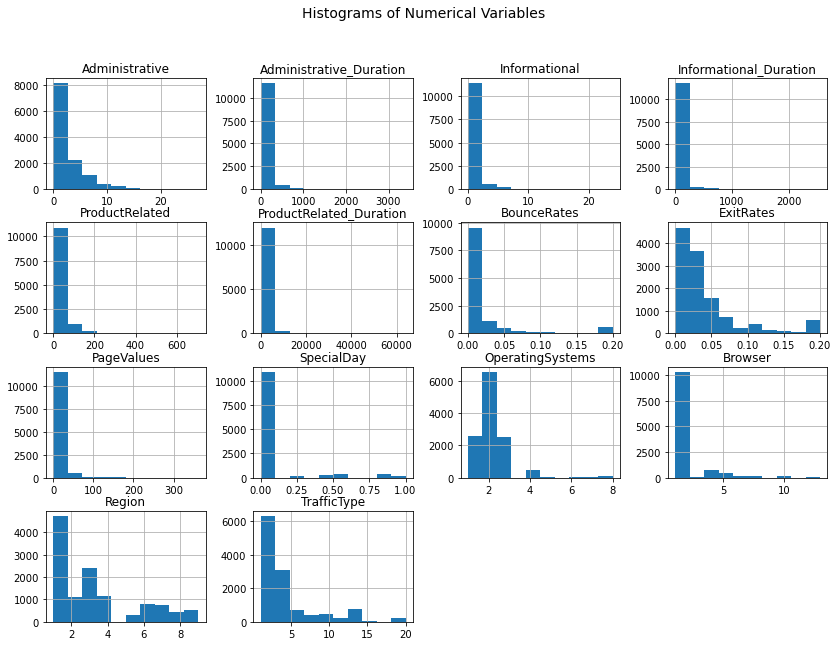

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

df_eco_num = df_eco_dropdp.select_dtypes(include = ['float64', 'int64']).copy()
df_eco_num.hist(figsize = (14,10))
plt.suptitle('Histograms of Numerical Variables', fontsize = 14)
plt.show()

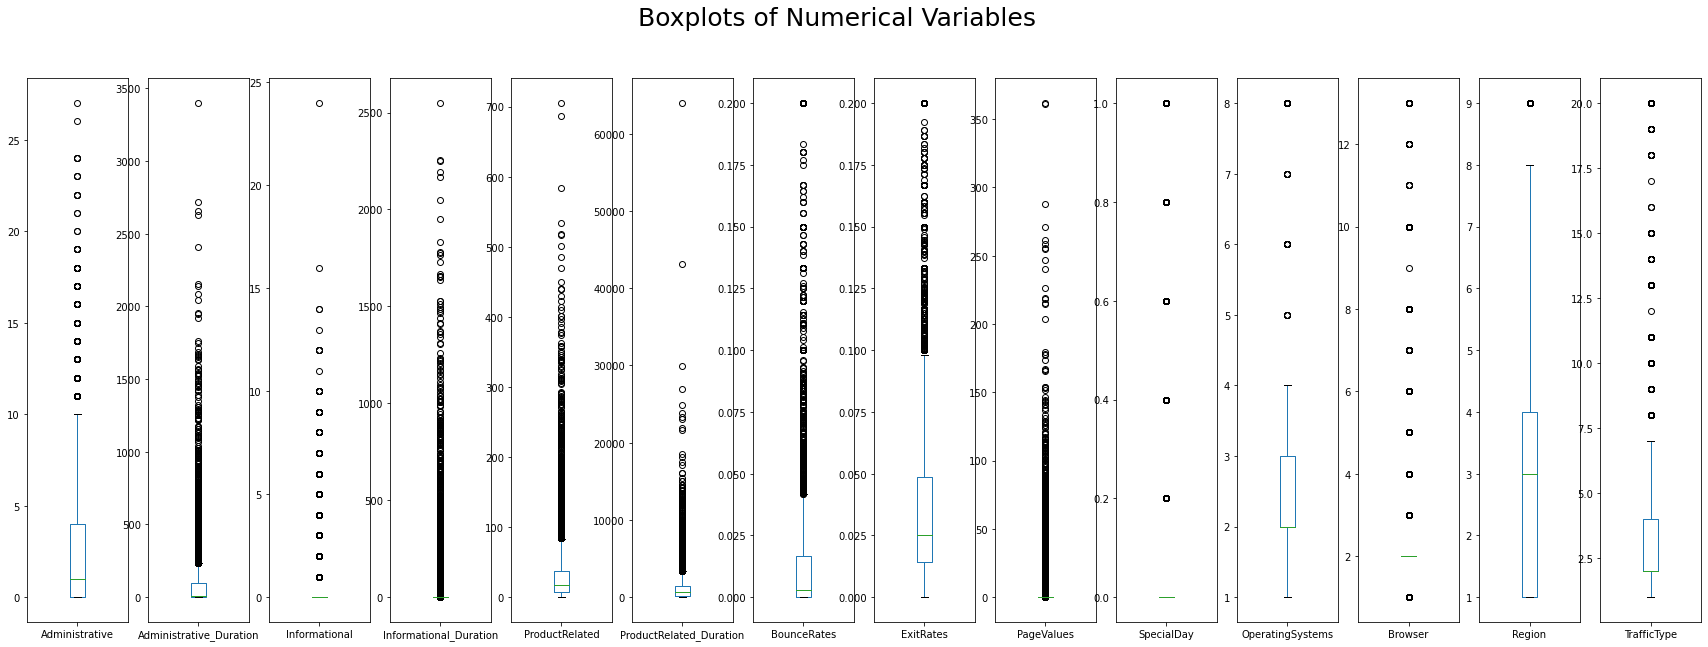

In [77]:
num_feature_size = df_eco_num.shape[1]
fig, axs = plt.subplots(1,num_feature_size,figsize=(30,10))

for idx in range(1, num_feature_size+1):
    plt.subplot(1,num_feature_size,idx)
    df_eco_num.iloc[:, idx-1].plot(kind = 'box')
plt.suptitle('Boxplots of Numerical Variables', fontsize = 25)
plt.show()


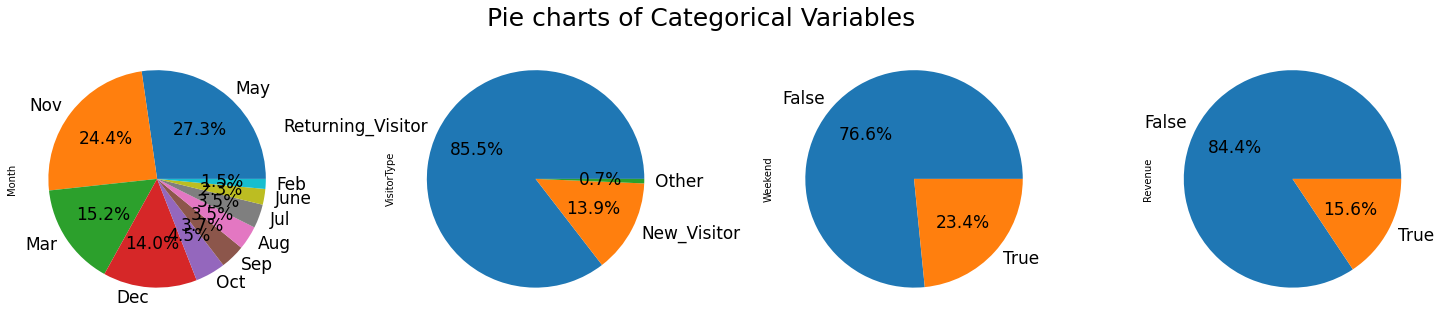

In [78]:
df_eco_cat = df_eco_dropdp.select_dtypes(include = ['object', 'bool']).copy()
cat_feature_size = df_eco_cat.shape[1]
fig,axs = plt.subplots(1, cat_feature_size, figsize = (26,5))

for idx in range(1, cat_feature_size+1):
    plt.subplot(1, cat_feature_size, idx)
    df_eco_cat.iloc[:, idx-1].value_counts().plot(kind = 'pie', autopct = "%1.1f%%", fontsize = 17)
    
plt.suptitle('Pie charts of Categorical Variables', fontsize = 25)
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

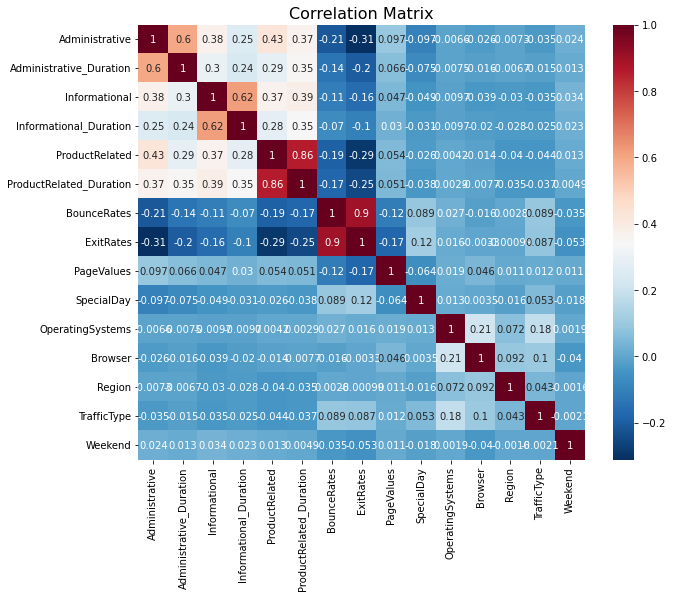

In [79]:
corr_matrix = df_eco_dropdp.loc[:, df_eco_dropdp.columns!= 'Revenue'].corr()
plt.figure(figsize = (10,8))
sns.heatmap(corr_matrix, cmap = 'RdBu_r', annot= True)
plt.title('Correlation Matrix', fontsize = 16)

In [80]:
df_eco_dropdp.columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

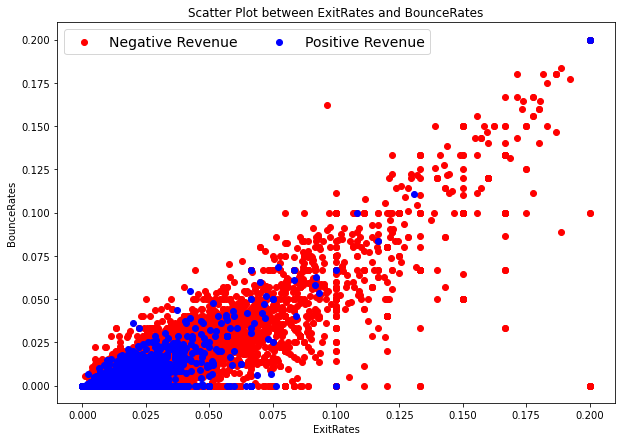

In [81]:
plt.figure(figsize = (10,7))

scatter2 = plt.scatter(x='ExitRates',y='BounceRates', data =df_eco_dropdp[df_eco_dropdp['Revenue']==False], c = 'red')        
scatter1 = plt.scatter(x='ExitRates',y='BounceRates', data =df_eco_dropdp[df_eco_dropdp['Revenue']==True], c= 'blue')
plt.legend((scatter2, scatter1),
           ('Negative Revenue', 'Positive Revenue',),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=14)
plt.title('Scatter Plot between ExitRates and BounceRates')
plt.xlabel('ExitRates')
plt.ylabel('BounceRates')
plt.show()

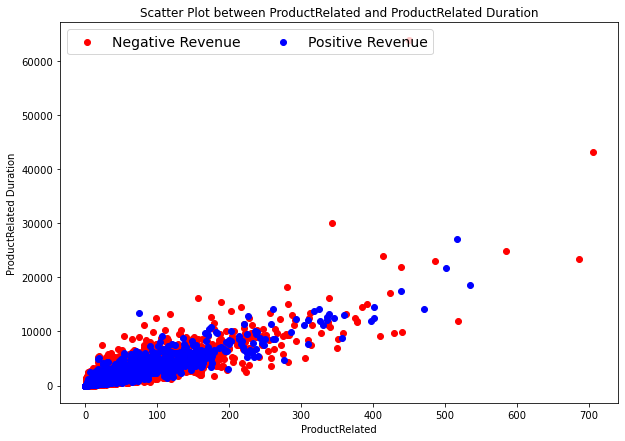

In [82]:
plt.figure(figsize = (10,7))

scatter2 = plt.scatter(x='ProductRelated',y='ProductRelated_Duration', data =df_eco_dropdp[df_eco_dropdp['Revenue']==False], c = 'red')        
scatter1 = plt.scatter(x='ProductRelated',y='ProductRelated_Duration', data =df_eco_dropdp[df_eco_dropdp['Revenue']==True], c= 'blue')
plt.legend((scatter2, scatter1),
           ('Negative Revenue', 'Positive Revenue',),
           scatterpoints=1,
           loc='upper left',
           ncol=3,
           fontsize=14)
plt.title('Scatter Plot between ProductRelated and ProductRelated Duration')
plt.xlabel('ProductRelated')
plt.ylabel('ProductRelated Duration')
plt.show()

Feature Engineering

In [83]:
df_eco_dropdp['Administrative'] =  pd.qcut(df_eco_dropdp['Administrative'], q=2)
df_eco_dropdp['Administrative_Duration'] =  pd.qcut(df_eco_dropdp['Administrative_Duration'], q=2)

In [84]:
df_eco_dropdp.loc[ df_eco_dropdp['Informational']>0,  'Informational'] = 1

In [102]:
df_eco_dropdp['Informational'] = df_eco_dropdp['Informational'].astype('float')

In [104]:
df_eco_dropdp.loc[ df_eco_dropdp['Informational_Duration']>0,  'Informational_Duration'] = 1

In [105]:
df_eco_dropdp['Informational_Duration'] = df_eco_dropdp['Informational_Duration'].astype('float')

In [ ]:
df_eco_dropdp['ProductRelated'] =  pd.qcut(df_eco_dropdp['ProductRelated'], q=3)
df_eco_dropdp['ProductRelated_Duration'] =  pd.qcut(df_eco_dropdp['ProductRelated_Duration'], q=3)

In [87]:
df_eco_dropdp['BounceRates'] =  pd.qcut(df_eco_dropdp['BounceRates'], q=2)


In [88]:
df_eco_dropdp['ExitRates'] =  pd.qcut(df_eco_dropdp['ExitRates'], q=10)

In [89]:
df_eco_dropdp.loc[ df_eco_dropdp['PageValues']>0,  'PageValues'] = 1

In [90]:
df_eco_dropdp['PageValues'].value_counts()

0.0    9475
1.0    2730
Name: PageValues, dtype: int64

In [91]:
df_eco_dropdp.loc[ df_eco_dropdp['SpecialDay']>0,  'SpecialDay'] = 1

In [92]:
df_eco_dropdp['SpecialDay'].value_counts()

0.0    10956
1.0     1249
Name: SpecialDay, dtype: int64

In [59]:
# df_eco_dropdp['OperatingSystems'] =  pd.qcut(df_eco_dropdp['OperatingSystems'], q=2)

In [60]:
# df_eco_dropdp['Browser'] =  pd.qcut(df_eco_dropdp['Browser'], q=2)

In [61]:
# df_eco_dropdp['Region'] =  pd.qcut(df_eco_dropdp['Region'], q=2)

In [62]:
# df_eco_dropdp['TrafficType'] =  pd.qcut(df_eco_dropdp['TrafficType'], q=3)

In [109]:
df_eco_dropdp.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(-0.001, 303.667]","(0.0029, 0.2]","(0.1, 0.2]",0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(-0.001, 303.667]","(-0.001, 0.0029]","(0.0564, 0.1]",0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(-0.001, 303.667]","(0.0029, 0.2]","(0.1, 0.2]",0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(-0.001, 303.667]","(0.0029, 0.2]","(0.1, 0.2]",0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,"(-0.001, 1.0]","(-0.001, 9.0]",0.0,0.0,"(-0.001, 11.0]","(303.667, 1098.525]","(0.0029, 0.2]","(0.04, 0.0564]",0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [62]:
# df_eco_dropdp['Revenue'] = df_eco_dropdp['Revenue'].astype('category').cat.codes.astype('int64')
# df_eco_dropdp['Weekend'] = df_eco_dropdp['Weekend'].astype('category').cat.codes.astype('int64')

In [117]:
df_eco_dropdp.dtypes

Administrative             category
Administrative_Duration    category
Informational               float64
Informational_Duration      float64
ProductRelated             category
ProductRelated_Duration    category
BounceRates                category
ExitRates                  category
PageValues                  float64
SpecialDay                  float64
Month                        object
OperatingSystems              int64
Browser                       int64
Region                        int64
TrafficType                   int64
VisitorType                  object
Weekend                        bool
Revenue                        bool
dtype: object

In [118]:
df_eco_dummy = df_eco_dropdp.select_dtypes(include = ['category','object', 'int64'])
df_eco_finish = df_eco_dropdp.select_dtypes(include = ['float64'])
df_eco_cat = df_eco_dropdp.select_dtypes(include = ['bool'])

df_eco_dummy.shape

(12205, 12)

In [119]:
df_eco_dummy = pd.get_dummies(df_eco_dummy.astype(str))

In [120]:
df_eco_dummy.shape

(12205, 85)

In [122]:
df_eco_cat['Revenue'] = df_eco_cat['Revenue'].astype('category').cat.codes.astype('int64')
df_eco_cat['Weekend'] = df_eco_cat['Weekend'].astype('category').cat.codes.astype('int64')

In [123]:
df_ip = pd.concat([df_eco_dummy, df_eco_cat,df_eco_finish],axis = 1)

In [125]:
df_ip.head()

,"Administrative_(-0.001, 1.0]","Administrative_(1.0, 27.0]","Administrative_Duration_(-0.001, 9.0]","Administrative_Duration_(9.0, 3398.75]","ProductRelated_(-0.001, 11.0]","ProductRelated_(11.0, 29.0]","ProductRelated_(29.0, 705.0]","ProductRelated_Duration_(-0.001, 303.667]","ProductRelated_Duration_(1098.525, 63973.522]","ProductRelated_Duration_(303.667, 1098.525]",...,TrafficType_9,VisitorType_New_Visitor,VisitorType_Other,VisitorType_Returning_Visitor,Weekend,Revenue,Informational,Informational_Duration,PageValues,SpecialDay
0,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
1,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
2,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
3,1,0,1,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0.0,0.0,0.0,0.0
4,1,0,1,0,1,0,0,0,0,1,...,0,0,0,1,1,0,0.0,0.0,0.0,0.0


Prepare Data

In [133]:
from sklearn.model_selection import train_test_split
import numpy as np

orig_X = df_ip.drop('Revenue', axis = 1)
orig_y = df_ip['Revenue']

orig_X_train_df, orig_X_test_df, orig_y_train_df,orig_y_test_df = train_test_split(orig_X, orig_y, test_size = 0.2, random_state = 42)
orig_X_train = orig_X_train_df.values
orig_X_test = orig_X_test_df.values
orig_y_train = orig_y_train_df.values
orig_y_test = orig_y_test_df.values

train_unique_label, train_unique_count = np.unique(orig_y_train,return_counts = True)
test_unique_label, test_unique_count = np.unique(orig_y_test, return_counts = True)
print('Label distribution : \n')
print(train_unique_count/len(orig_y_train))
print(test_unique_count/len(orig_y_test))

Label distribution : 

[0.84166325 0.15833675]
[0.85170012 0.14829988]


In [248]:
pip install statsmodels


  Using cached patsy-0.5.2-py2.py3-none-any.whl (233 kB)


In [249]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Colinearity
variance_inflation_factor(orig_X_train, 1)

80546.99612262467

In [139]:
# random undersampling 

orig_train = pd.concat([orig_X_train_df, orig_y_train_df], axis = 1)
df_undersp = orig_train.sample(frac = 1)
df_pos = df_undersp.loc[df_undersp['Revenue']==1]
df_neg = df_undersp.loc[df_undersp['Revenue']!=1][:len(df_pos)]


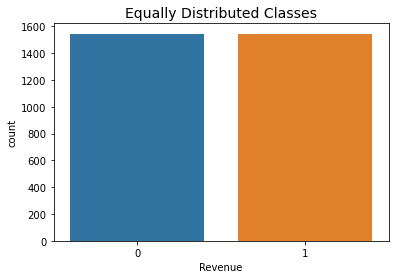

In [140]:
balance_df = pd.concat([df_pos, df_neg]).sample(frac = 1, random_state = 40)
balance_df['Revenue'].value_counts()
sns.countplot('Revenue', data = balance_df)
plt.title('Equally Distributed Classes', fontsize = 14)
plt.show()

In [163]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [151]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

X_us = balance_df.drop('Revenue', axis = 1)
y_us = balance_df.loc[:,['Revenue']]

log_reg_params = {"penalty": ['l1', 'l2','elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,cv = 5, n_jobs = -1, verbose = 2)

grid_log_reg.fit(X_us, y_us)
us_log_reg = grid_log_reg.best_estimator_

log_reg_score = cross_val_score(us_log_reg, X_us, y_us, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Logistic Regression Cross Validation Score:  85.35%


In [152]:
from sklearn.ensemble import RandomForestClassifier

random_forest_params = {
    'max_depth': [10,20],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [500, 1000]
}
grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = random_forest_params, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_rf.fit(X_us, y_us)
us_rf = grid_rf.best_estimator_

rf_score = cross_val_score(us_rf, X_us, y_us, cv=5)
print('Logistic Regression Cross Validation Score: ', round(rf_score.mean() * 100, 2).astype(str) + '%')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Logistic Regression Cross Validation Score:  85.77%


In [153]:
pip install xgboost

In [162]:
# pip install lightgbm

In [161]:
from lightgbm import LGBMClassifier

import re
X_us_xgb = X_us.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))

xgboost_params = {
    'max_depth': [3,5,7],
    'n_estimators': [500, 1000],
    'colsample_bytree':[0.8,1]
}
grid_xgb = GridSearchCV(estimator = XGBClassifier(), param_grid = xgboost_params, 
                          cv = 5, n_jobs = -1, verbose = 2)

grid_xgb.fit(X_us_xgb, y_us)
us_xgb = grid_xgb.best_estimator_
xgb_score = cross_val_score(us_xgb, X_us_xgb, y_us, cv=5)
print('XGboost Cross Validation Score: ', round(xgb_score.mean() * 100, 2).astype(str) + '%')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[16:02:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[16:02:27

SMOTE Oversampling

In [156]:
pip install imblearn

Note: you may need to restart the kernel to use updated packages.


In [212]:
from imblearn.over_sampling import SMOTE

oversample = SMOTE(sampling_strategy = 'minority')
X_os, y_os = oversample.fit_resample(orig_X_train, orig_y_train)

train_unique_label, train_unique_count = np.unique(y_os,return_counts = True)
test_unique_label, test_unique_count = np.unique(orig_y_test, return_counts = True)
print('Label distribution : \n')
print(train_unique_count/len(y_os))
print(test_unique_count/len(orig_y_test))

Label distribution : 

[0.5 0.5]
[0.85170012 0.14829988]


In [213]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

log_reg_params = {"penalty": ['l1', 'l2','elasticnet'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid_log_reg = GridSearchCV(LogisticRegression(), log_reg_params,cv = 5, n_jobs = -1, verbose = 2)

grid_log_reg.fit(X_os, y_os)
os_log_reg = grid_log_reg.best_estimator_

log_reg_score = cross_val_score(os_log_reg, X_os, y_os, cv=5)
print('Logistic Regression Cross Validation Score: ', round(log_reg_score.mean() * 100, 2).astype(str) + '%')

Fitting 5 folds for each of 21 candidates, totalling 105 fits
Logistic Regression Cross Validation Score:  86.36%


In [214]:
random_forest_params = {
    'max_depth': [10,20],
    'min_samples_leaf': [3, 4, 5],
    'n_estimators': [500, 1000]
}
grid_rf = GridSearchCV(estimator = RandomForestClassifier(), param_grid = random_forest_params, 
                          cv = 5, n_jobs = -1, verbose = 2)
grid_rf.fit(X_os, y_os)
os_rf = grid_rf.best_estimator_

rf_score = cross_val_score(os_rf, X_os, y_os, cv=5)
print('Logistic Regression Cross Validation Score: ', round(rf_score.mean() * 100, 2).astype(str) + '%')

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Logistic Regression Cross Validation Score:  93.35%


Classifier Estimation 

In [218]:
y_pred_us_log_reg = us_log_reg.predict(orig_X_test)
y_pred_us_rf = us_rf.predict(orig_X_test)

y_pred_os_log_reg = os_log_reg.predict(orig_X_test)
y_pred_os_rf = os_rf.predict(orig_X_test)

In [252]:
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score

def models_evaluation_classification_report(models,y_pred_dict, y_test, labels = ['False', 'True']):
    for key, model in models.items():
        y_pred = y_pred_dict[key]
        print('{}:'.format(key))
        print(classification_report(y_test, y_pred, target_names=labels))
        print('{} F1 score:'.format(key), '{:.3f} \n'.format(f1_score(y_test, y_pred)))

In [253]:
models = {'Undersampling Logistic Regression': us_log_reg, 'Undersampling Random Forest':us_rf, \
             'Oversampling Logistic Regression': os_log_reg, 'Oversampling Random Forest':os_rf}
y_pred_dict =  {'Undersampling Logistic Regression': y_pred_us_log_reg, 'Undersampling Random Forest':y_pred_us_rf,\
               'Oversampling Logistic Regression': y_pred_os_log_reg, 'Oversampling Random Forest':y_pred_os_rf}


models_evaluation_classification_report(models,y_pred_dict, orig_y_test)


Undersampling Logistic Regression:
              precision    recall  f1-score   support

       False       0.96      0.87      0.91      2079
        True       0.52      0.80      0.63       362

    accuracy                           0.86      2441
   macro avg       0.74      0.84      0.77      2441
weighted avg       0.90      0.86      0.87      2441

Undersampling Logistic Regression F1 score: 0.630 

Undersampling Random Forest:
              precision    recall  f1-score   support

       False       0.97      0.84      0.90      2079
        True       0.48      0.85      0.62       362

    accuracy                           0.84      2441
   macro avg       0.73      0.85      0.76      2441
weighted avg       0.90      0.84      0.86      2441

Undersampling Random Forest F1 score: 0.618 

Oversampling Logistic Regression:
              precision    recall  f1-score   support

       False       0.96      0.87      0.91      2079
        True       0.51      0.79      0.

In [254]:


def models_evaluation_ROC_curve(models,y_pred_dict, X_test, y_test, labels = ['False', 'True']):
    
    num_models = len(models)
    
    plt.figure(figsize=(8,6))
    plt.title('ROC Curves of Classifiers', fontsize=18)
    
    for key, model in models.items():
        y_pred = y_pred_dict[key]
        fpr, tpr, thresold = roc_curve(y_test, model.predict_proba(X_test)[:,1])
        plt.plot(fpr, tpr, label='{} Classifier Score: {:.4f}'.format(key, roc_auc_score(y_test, y_pred)))
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.01, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.legend()

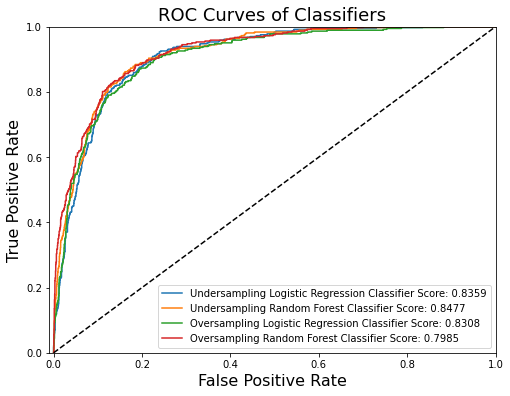

In [256]:
models_evaluation_ROC_curve(models,y_pred_dict, orig_X_test,   orig_y_test)

Feature Analysis

In [283]:
log_reg_importances = pd.DataFrame(data={
    'Feature': orig_X_train_df.columns,
    'Importance': os_log_reg.coef_[0]
})
log_reg_importances = log_reg_importances.sort_values(by='Importance', ascending=False)

In [284]:
log_reg_importances = pd.concat([log_reg_importances.head(10), log_reg_importances.tail(10)], axis =0)

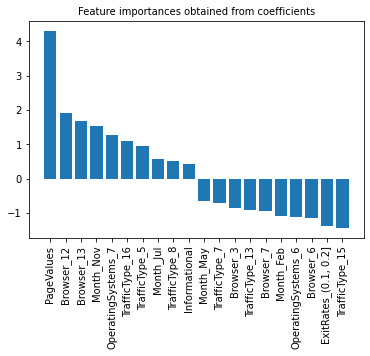

<Figure size 936x504 with 0 Axes>

In [293]:
log_reg_importances = pd.concat([log_reg_importances.iloc[:10], log_reg_importances.iloc[-10:]], axis = 0)
plt.bar(x=log_reg_importances['Feature'], height=log_reg_importances['Importance'])
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.figure(figsize=(13, 7))
plt.show()

In [298]:
os_rf.feature_importances_

0.01058181578241269

In [306]:
rf_importances = pd.DataFrame(data={
    'Feature': orig_X_train_df.columns,
    'Importance': os_rf.feature_importances_
})
rf_importances = rf_importances.sort_values(by='Importance', ascending=False)

In [308]:
rf_importances = pd.concat([rf_importances.head(20)], axis =0)

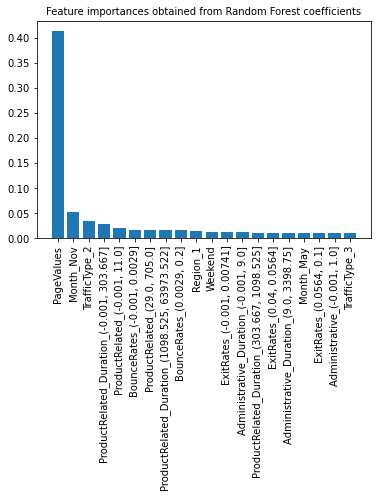

<Figure size 936x504 with 0 Axes>

In [309]:
plt.bar(x=rf_importances['Feature'], height=rf_importances['Importance'])
plt.title('Feature importances obtained from Random Forest coefficients', size=10)
plt.xticks(rotation='vertical')
plt.figure(figsize=(13, 7))
plt.show()